In [1]:
import cmocean
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import scipy.stats as stats
import seaborn as sns
import warnings
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')
with warnings.catch_warnings():
    warnings.filterwarnings('ignore')
    sns.set_palette(plt.rcParams['axes.color_cycle'][1:])

C:\ProgramData\Anaconda3\lib\site-packages\cmocean\tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


# I. Read Data and Renaming

In [2]:
race_data = pd.read_csv('jra_race_result.csv', encoding='UTF-8')

col_name_english = {
    '開催日': 'Date', '競馬場': 'Place', 'レース番号': 'Race Number', 'レース名': 'Race Name', 'コース': 'Track Surface', 
    '周回': 'Inner/Outer Track', '距離': 'Distance', '馬場状態': 'Racecourse Condition', '賞金': 'Prize Pool', 
    '頭数': 'No. of Contestants', '着順': 'Rank', '枠番': 'Track Cat.', '馬番': 'Track No.', 
    '馬名': 'Name', '性別': 'Gender', '年齢': 'Age', '騎手': 'Jockey', 
    'タイム': 'Time', '着差': 'Physical Diff.', '通過順': 'Temp. Rank', '上り3F': 'Time (Last 600m)',
    '斤量': 'Weight', '馬体重': 'Net Weight', '増減': 'Weight Change', 
    '人気': 'Popularity', 'オッズ': 'Odds', 'ブリンカー': 'Blinkers', 
    '調教師': 'Trainer', '調教コメント': 'Comment', '調教評価': 'Grade'    
}
race_data_column_list = list(race_data.columns)
for column_index in range(len(race_data_column_list)):
    try:
        race_data_column_list[column_index] = col_name_english[race_data_column_list[column_index]]
    except KeyError as error:
        continue
race_data.columns = race_data_column_list

gender_name_english = {
    '牡': 'male/stallion',
    '牝': 'female/mare',
    'セ': 'gelding'
}
race_data['Gender'] = race_data['Gender'].apply(lambda gender: gender_name_english[gender])
race_data.head(10)

,Date,Place,Race Number,Race Name,Track Surface,Inner/Outer Track,Distance,Racecourse Condition,Prize Pool,No. of Contestants,...,Time (Last 600m),Weight,Net Weight,Weight Change,Popularity,Odds,Blinkers,Trainer,Comment,Grade
0,2013-01-05,中山,1,サラ系3歳未勝利,ダート,右,1200,良,500.0,16,...,39.4,56.0,484.0,2.0,1,1.9,NaN,宗像 義忠,好調持続,B
1,2013-01-05,中山,1,サラ系3歳未勝利,ダート,右,1200,良,200.0,16,...,39.3,54.0,454.0,-2.0,7,44.1,NaN,大和田 成,多少良化,C
2,2013-01-05,中山,1,サラ系3歳未勝利,ダート,右,1200,良,125.0,16,...,39.1,54.0,396.0,0.0,5,11.8,NaN,栗田 徹,好調持続,B
3,2013-01-05,中山,1,サラ系3歳未勝利,ダート,右,1200,良,75.0,16,...,39.5,56.0,484.0,6.0,2,5.3,NaN,奥平 雅士,出来は良,B
4,2013-01-05,中山,1,サラ系3歳未勝利,ダート,右,1200,良,50.0,16,...,38.9,56.0,462.0,2.0,3,6.1,NaN,小野 次郎,元気一杯,B
5,2013-01-05,中山,1,サラ系3歳未勝利,ダート,右,1200,良,0.0,16,...,39.4,56.0,474.0,8.0,6,19.0,NaN,古賀 史生,まずまず,C
6,2013-01-05,中山,1,サラ系3歳未勝利,ダート,右,1200,良,0.0,16,...,40.0,53.0,506.0,-4.0,10,55.2,NaN,二ノ宮 敬宇,仕上がる,C
7,2013-01-05,中山,1,サラ系3歳未勝利,ダート,右,1200,良,0.0,16,...,38.8,56.0,448.0,8.0,14,207.1,NaN,高橋 裕,良化薄い,C
8,2013-01-05,中山,1,サラ系3歳未勝利,ダート,右,1200,良,0.0,16,...,39.7,54.0,448.0,-4.0,11,57.4,NaN,中野 栄治,前走並み,C
9,2013-01-05,中山,1,サラ系3歳未勝利,ダート,右,1200,良,0.0,16,...,39.4,54.0,476.0,-2.0,4,8.5,NaN,武藤 善則,やや良化,C


In [3]:
race_data.groupby(['Trainer', 'Name']).count().sort_values('Race Number', ascending=False)

,,Date,Place,Race Number,Race Name,Track Surface,Inner/Outer Track,Distance,Racecourse Condition,Prize Pool,No. of Contestants,...,Temp. Rank,Time (Last 600m),Weight,Net Weight,Weight Change,Popularity,Odds,Blinkers,Comment,Grade
Trainer,Name,,,,,,,,,,,,,,,,,,,,,
岩元 市三,ボストンビリーヴ,55,55,55,55,55,55,55,55,55,55,...,55,55,55,55,55,55,55,0,55,55
二本柳 俊一,カシノワルツ,54,54,54,54,54,54,54,54,54,54,...,50,54,54,54,54,54,54,54,53,53
西橋 豊治,スズカルパン,53,53,53,53,53,53,53,53,53,53,...,53,53,53,53,53,53,53,0,53,53
坪 憲章,スズカウラノス,53,53,53,53,53,53,53,53,53,53,...,53,53,53,53,53,53,53,0,53,53
日吉 正和,ゼンノスサノヲ,51,51,51,51,51,51,51,51,51,51,...,51,51,51,51,50,51,51,0,51,51
二本柳 俊一,カンタベリーナイト,49,49,49,49,49,49,49,49,49,49,...,49,49,49,49,49,49,49,37,49,49
清水 久詞,ワキノブレイブ,49,49,49,49,49,49,49,49,49,49,...,49,49,49,49,49,49,49,0,49,49
西橋 豊治,サンレイフローラ,48,48,48,48,48,48,48,48,48,48,...,48,48,48,48,47,48,48,14,48,48
浅見 秀一,レディー,47,47,47,47,47,47,47,47,47,47,...,47,47,47,47,47,47,47,0,47,47


In [4]:
race_data.describe()

,Race Number,Distance,Prize Pool,No. of Contestants,Rank,Track Cat.,Track No.,Age,Time,Time (Last 600m),Weight,Net Weight,Weight Change,Popularity,Odds
count,198401.000000,198401.000000,198401.000000,198401.000000,198401.000000,198401.000000,198401.000000,198401.000000,198401.000000,198399.000000,198401.000000,198400.000000,180511.000000,198401.000000,198393.000000
mean,6.460109,1646.762668,134.113334,14.934285,7.911815,4.739648,7.967208,3.647149,102.142797,36.288284,55.051189,470.749929,0.360011,7.939970,64.847577
std,3.479533,419.509983,444.799463,2.239396,4.466580,2.273737,4.491326,1.334869,29.180401,4.558838,1.757893,29.892183,6.725042,4.478727,93.671216
min,1.000000,1000.000000,0.000000,5.000000,1.000000,1.000000,1.000000,2.000000,54.100000,12.800000,48.000000,346.000000,-48.000000,1.000000,1.100000
25%,3.000000,1400.000000,0.000000,14.000000,4.000000,3.000000,4.000000,3.000000,81.100000,35.200000,54.000000,450.000000,-4.000000,4.000000,8.700000
50%,6.000000,1600.000000,0.000000,16.000000,8.000000,5.000000,8.000000,3.000000,99.200000,36.700000,55.000000,470.000000,0.000000,8.000000,24.600000
75%,10.000000,1800.000000,112.500000,16.000000,11.000000,7.000000,12.000000,4.000000,116.400000,38.300000,56.000000,490.000000,4.000000,12.000000,79.000000
max,12.000000,4250.000000,30000.000000,18.000000,18.000000,8.000000,18.000000,13.000000,302.000000,108.700000,63.000000,640.000000,54.000000,18.000000,999.900000


# II. Exploratory Analysis

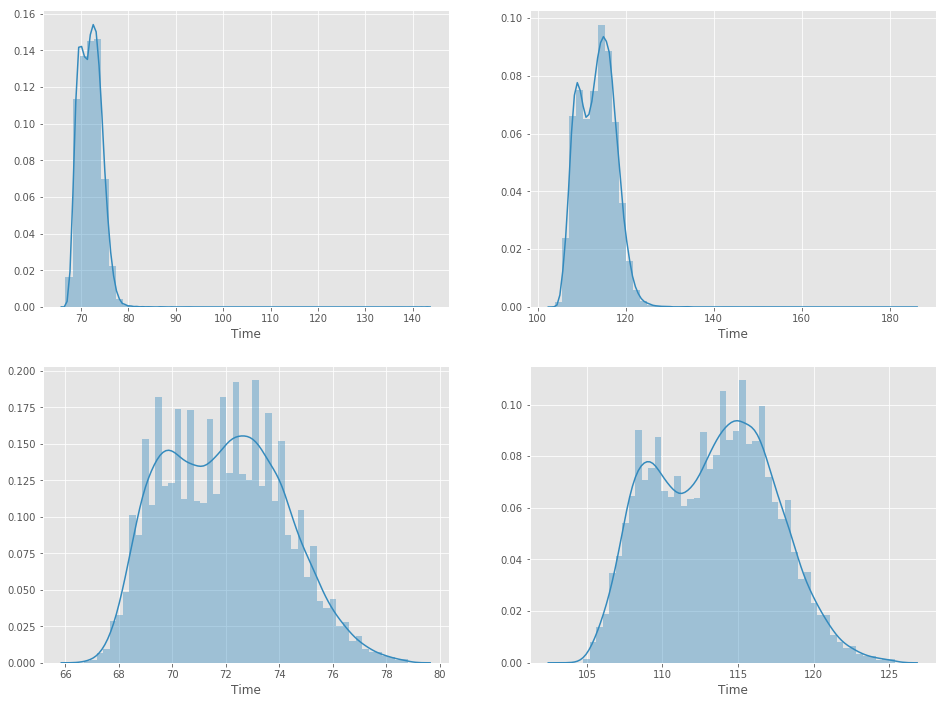

In [5]:
race_data_1200 = race_data.loc[race_data['Distance'] == 1200, :]
race_data_1800 = race_data.loc[race_data['Distance'] == 1800, :]
fig, ax = plt.subplots(2, 2)
sns.distplot(race_data_1200['Time'], ax=ax[0][0])
sns.distplot(race_data_1800['Time'], ax=ax[0][1])
sns.distplot(race_data_1200[stats.zscore(race_data_1200['Time']) < 3]['Time'], ax=ax[1][0])
sns.distplot(race_data_1800[stats.zscore(race_data_1800['Time']) < 3]['Time'], ax=ax[1][1])

In [6]:
print(stats.mstats.normaltest(race_data_1200[stats.zscore(race_data_1200['Time']) < 3]['Time']))
print(stats.mstats.normaltest(race_data_1800[stats.zscore(race_data_1800['Time']) < 3]['Time']))

NormaltestResult(statistic=1853.8720800836827, pvalue=0.0)
NormaltestResult(statistic=2642.5428275147046, pvalue=0.0)


In [7]:
race_data_1200_age_gender = race_data_1200.loc[stats.zscore(race_data_1200['Time']) < 3, ['Age', 'Gender', 'Time']]
race_data_1800_age_gender = race_data_1800.loc[stats.zscore(race_data_1800['Time']) < 3, ['Age', 'Gender', 'Time']]

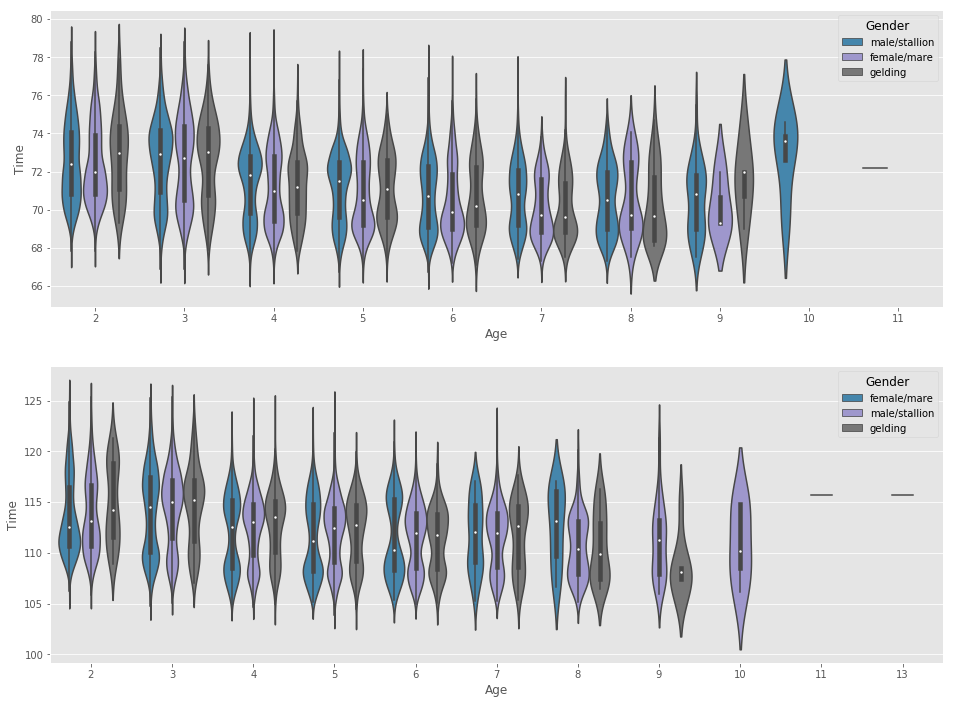

In [8]:
fig, ax = plt.subplots(2, 1)
sns.violinplot(x='Age', y='Time', hue='Gender', data=race_data_1200_age_gender, ax=ax[0])
sns.violinplot(x='Age', y='Time', hue='Gender', data=race_data_1800_age_gender, ax=ax[1])

# III. Distribution Fit

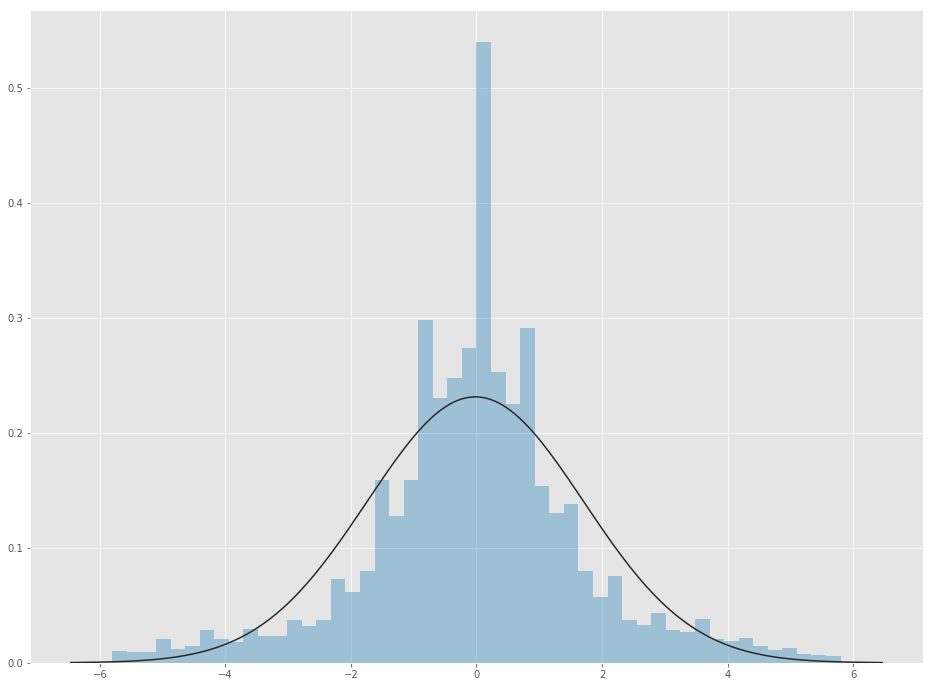

In [9]:
from functools import reduce
from scipy.stats import norm

def get_residual(time_date_list, max_diff=pd.Timedelta(weeks=52)):
    residual_list = []
    time_date_list = sorted(time_date_list, key=lambda x: pd.Timestamp(x.split(":")[1]))
    time_date_list = list(map(lambda x: x.split(":"), time_date_list))
    for index in range(1, len(time_date_list)):
        if pd.Timestamp(time_date_list[index][1]) - pd.Timestamp(time_date_list[index-1][1]) <= max_diff:
            residual_list.append(float(time_date_list[index][0]) - float(time_date_list[index-1][0]))
        else:
            residual_list.append('NA')
    return residual_list      

race_data_1200_sorted = race_data_1200.loc[:, :].sort_values("Race Name").sort_values("Date").sort_values("Name")
race_data_1200_sorted[["Time", "Time (Last 600m)"]] = race_data_1200_sorted[["Time", "Time (Last 600m)"]].astype(str)
race_data_1200_sorted["Time:Date"] = race_data_1200_sorted["Time"].str.cat(race_data_1200_sorted["Date"], sep=":")
time_aggregate = race_data_1200_sorted.groupby("Name")["Time:Date"].aggregate(lambda x: reduce((lambda x, y: x + "," + y), x))
time_residual = time_aggregate.apply(lambda x: x.split(",")).apply(lambda y: get_residual(y))
time_residual_list = list(time_residual)
time_residual_list = [element for lst in time_residual_list for element in lst]

time_residual_series = pd.Series(time_residual_list)
time_residual_series_plot = time_residual_series[time_residual_series.apply(lambda x: x != 'NA')].astype(float)
sns.distplot(time_residual_series_plot[abs(stats.zscore(time_residual_series_plot)) <= 3], fit=norm, kde=False)

NormaltestResult(statistic=956.9286517953044, pvalue=1.6054008001218611e-208)


((array([-4.06332686, -3.85143017, -3.73565801, ...,  3.73565801,
          3.85143017,  4.06332686]),
  array([-5.8, -5.8, -5.8, ...,  5.8,  5.8,  5.8])),
 (1.6961866770629075, -0.017878206246727819, 0.98351460250619172))

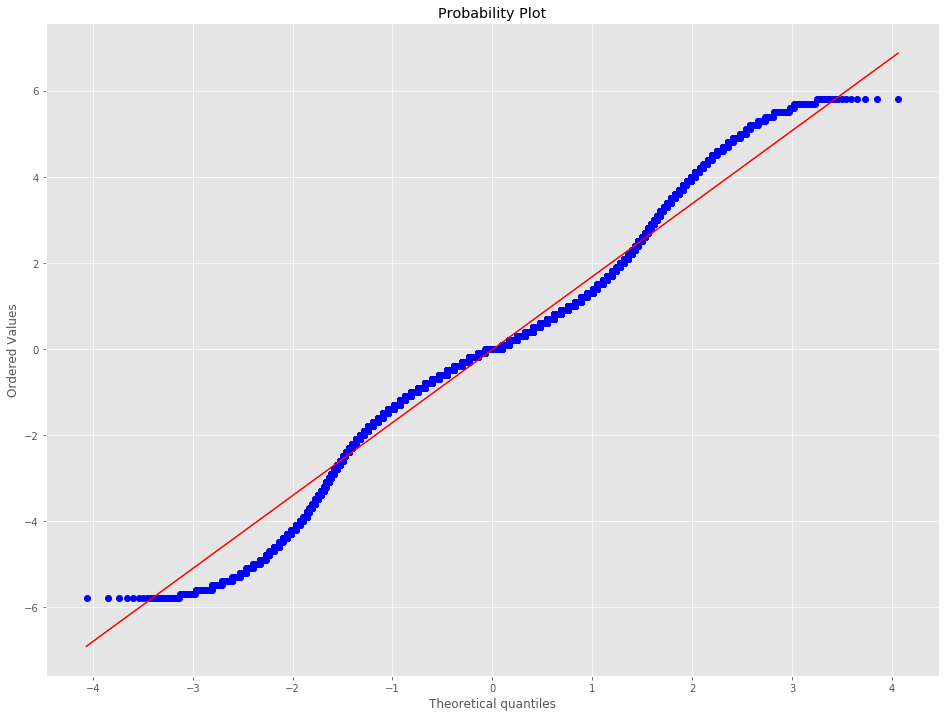

In [10]:
print(stats.mstats.normaltest(time_residual_series_plot[abs(stats.zscore(time_residual_series_plot)) <= 3]))
stats.probplot(time_residual_series_plot[abs(stats.zscore(time_residual_series_plot)) <= 3], dist="norm", plot=plt)

In [11]:
import sys

def best_fit_distribution(data, bins=200, ax=None):
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0
    DISTRIBUTIONS = [        
        stats.alpha,stats.anglit,stats.arcsine,stats.beta,stats.betaprime,stats.bradford,stats.burr,stats.cauchy,stats.chi,stats.chi2,stats.cosine,
        stats.dgamma,stats.dweibull,stats.erlang,stats.expon,stats.exponnorm,stats.exponweib,stats.exponpow,stats.f,stats.fatiguelife,stats.fisk,
        stats.foldcauchy,stats.foldnorm,stats.frechet_r,stats.frechet_l,stats.genlogistic,stats.genpareto,stats.gennorm,stats.genexpon,
        stats.genextreme,stats.gausshyper,stats.gamma,stats.gengamma,stats.genhalflogistic,stats.gilbrat,stats.gompertz,stats.gumbel_r,
        stats.gumbel_l,stats.halfcauchy,stats.halflogistic,stats.halfnorm,stats.halfgennorm,stats.hypsecant,stats.invgamma,stats.invgauss,
        stats.invweibull,stats.johnsonsb,stats.johnsonsu,stats.ksone,stats.kstwobign,stats.laplace,stats.levy,stats.levy_l,stats.levy_stable,
        stats.logistic,stats.loggamma,stats.loglaplace,stats.lognorm,stats.lomax,stats.maxwell,stats.mielke,stats.nakagami,stats.ncx2,stats.ncf,
        stats.nct,stats.norm,stats.pareto,stats.pearson3,stats.powerlaw,stats.powerlognorm,stats.powernorm,stats.rdist,stats.reciprocal,
        stats.rayleigh,stats.rice,stats.recipinvgauss,stats.semicircular,stats.t,stats.triang,stats.truncexpon,stats.truncnorm,stats.tukeylambda,
        stats.uniform,stats.vonmises,stats.vonmises_line,stats.wald,stats.weibull_min,stats.weibull_max,stats.wrapcauchy
    ]
    best_distribution = stats.norm
    best_params = (-0.014573872237359967, 2.8339301972446616)
    best_sse = np.inf
    for distribution in DISTRIBUTIONS:
        try:
            sys.stdout.write("current_distribution: %s, best_distribution: %s, best_sse: %f\r" \
                             % (distribution.name, best_distribution.name, best_sse))
            sys.stdout.flush()
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')
                params = distribution.fit(data)
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse
        except Exception:
            pass
    return (best_distribution, best_params)

def make_pdf(dist, params, size=10000):
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)
    return pdf

# bfd = best_fit_distribution(time_residual_series_plot[abs(stats.zscore(time_residual_series_plot)) <= 3])
# pdf = make_pdf(bfd[0], bfd[1])

# IV. Preprocessing for Regression Analysis

In [12]:
reg_data = race_data_1200_sorted.copy()
time_residual_non_empty = time_residual.loc[time_residual.apply(lambda x: len(x) > 0)].apply(lambda x: ['NA'] + x)
time_residual_non_empty_list = [sub_element for element in list(time_residual_non_empty) for sub_element in element]
reg_data_sort_by_name = reg_data[reg_data['Name'].apply(lambda x: x in time_residual_non_empty.index)].sort_values('Name')
assert len(time_residual_non_empty_list) == reg_data_sort_by_name.shape[0]
reg_data_sort_by_name['Time Residual'] = pd.Series(time_residual_non_empty_list)
reg_data = reg_data_sort_by_name.copy()
reg_data = reg_data.drop(['Physical Diff.', 'Track Cat.', 'Rank', 'Jockey', 'Comment', 'Temp. Rank', 'Name', 'Date', 'Place', 'Race Name', 'Distance', 
                          'Time (Last 600m)', 'Time:Date', 'Time', 'Blinkers'], axis=1).dropna()
print(pd.concat([reg_data.isnull().sum(), (reg_data.isnull().sum()/reg_data.isnull().count()).apply(lambda x: "{0:.2f}%".format(x * 100))], axis=1, keys=["Missing Value", "Missing Value (%)"]))
reg_data = reg_data[reg_data['Time Residual'].apply(lambda x: x != 'NA')]
reg_data['Time Residual'] = reg_data['Time Residual'].astype(float)
print(reg_data.shape)

                      Missing Value Missing Value (%)
Race Number                       0             0.00%
Track Surface                     0             0.00%
Inner/Outer Track                 0             0.00%
Racecourse Condition              0             0.00%
Prize Pool                        0             0.00%
No. of Contestants                0             0.00%
Track No.                         0             0.00%
Gender                            0             0.00%
Age                               0             0.00%
Weight                            0             0.00%
Net Weight                        0             0.00%
Weight Change                     0             0.00%
Popularity                        0             0.00%
Odds                              0             0.00%
Trainer                           0             0.00%
Grade                             0             0.00%
Time Residual                     0             0.00%
(4889, 17)


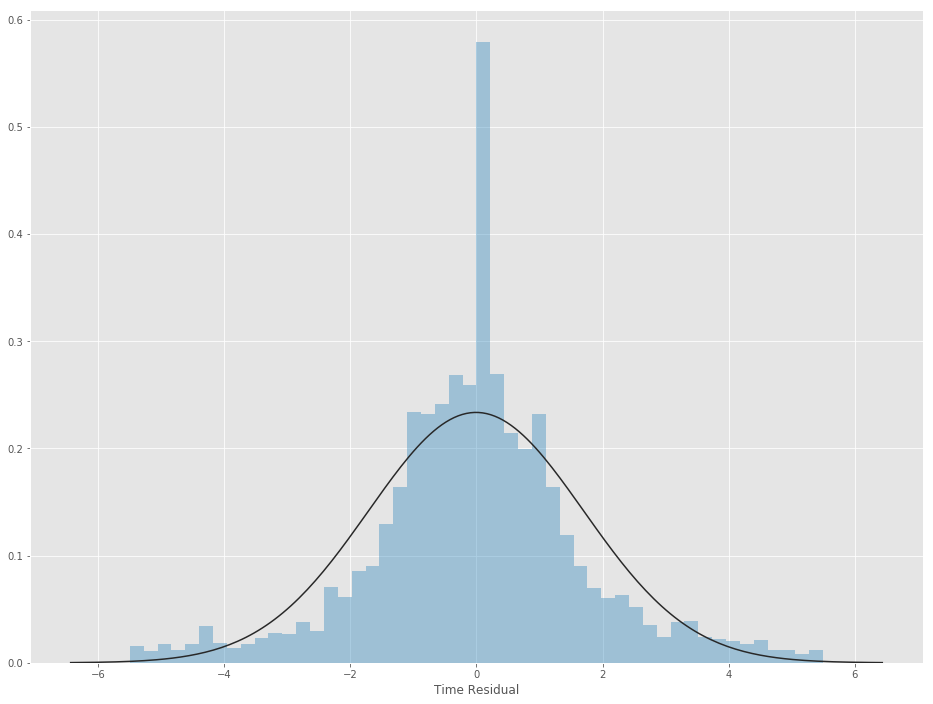

In [13]:
sns.distplot(reg_data['Time Residual'][abs(stats.zscore(reg_data['Time Residual'])) <= 3], kde=False, fit=norm)

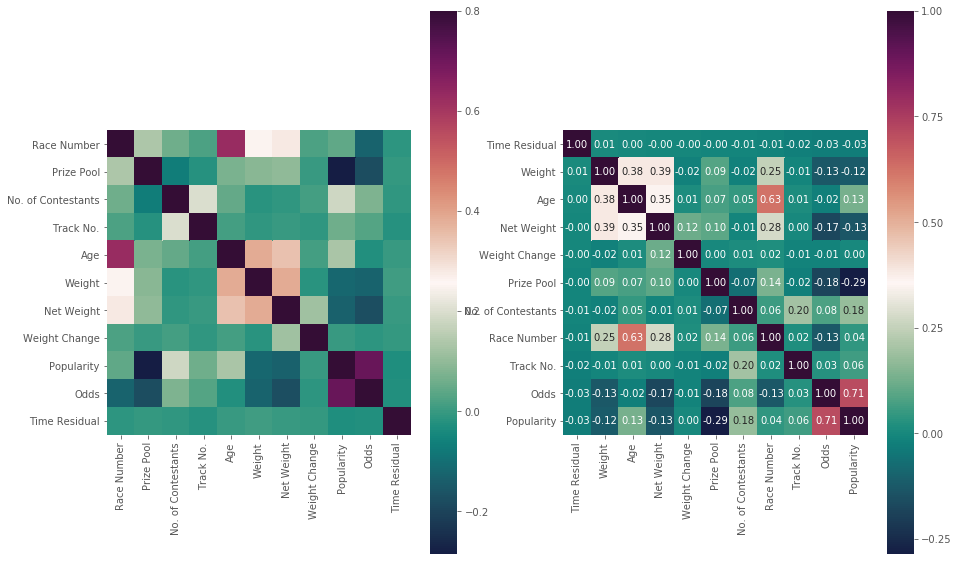

In [14]:
corr = reg_data.corr()
corr_mat = reg_data.corr()
k = 20
cols = corr_mat.nlargest(k, "Time Residual")["Time Residual"].index
cm = np.corrcoef(reg_data[cols].values.T)

fig, ax = plt.subplots(1,2)
fig.set_size_inches(15, 10)
sns.heatmap(corr, vmax=.8, square=True, ax=ax[0], cmap=cmocean.cm.curl)
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels=cols.values, xticklabels=cols.values, ax=ax[1], cmap=cmocean.cm.curl)

In [15]:
reg_X = reg_data.drop('Time Residual', axis=1)
for column in reg_X.columns:
    if reg_X[column].dtype == object and column != 'Trainer':
        reg_X = reg_X.join(pd.get_dummies(reg_X[column]).iloc[:, 1:])
        reg_X = reg_X.drop(column, axis=1)
reg_X = reg_X.drop('Track No.', axis=1)
reg_X = reg_X.join(pd.get_dummies(reg_X['Age']).iloc[:, 1:], rsuffix='_age')
reg_X = reg_X.drop('Age', axis=1)
reg_y = reg_data['Time Residual']
reg_X = reg_X.drop('Trainer', axis=1)

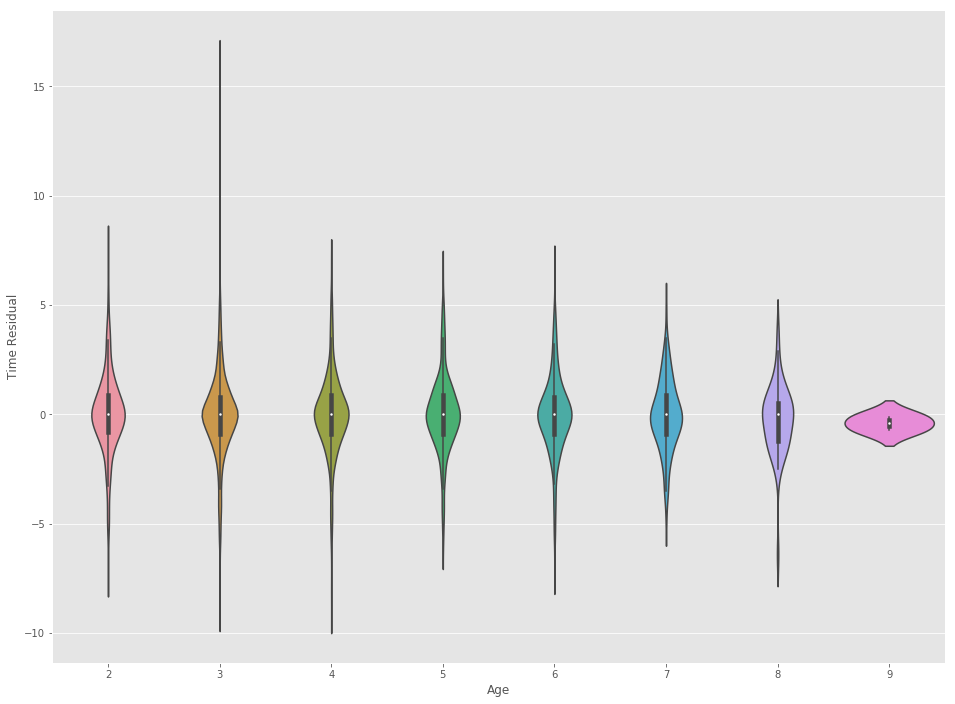

In [16]:
sns.violinplot(x=reg_data['Age'].astype(int), y=reg_data['Time Residual'].astype(float))

In [17]:
import statsmodels.api as sm

new_model = sm.OLS(reg_y, reg_X)
results = new_model.fit()
results.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Time Residual   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.6823
Date:                Wed, 22 Nov 2017   Prob (F-statistic):              0.879
Time:                        14:38:47   Log-Likelihood:                -9938.1
No. Observations:                4889   AIC:                         1.993e+04
Df Residuals:                    4864   BIC:                         2.009e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Race Number           -0.0194      0.011     -1.827      0.068      -0.040       0.001
Prize Pool         -7.367e-05   8.46e-05     -0.871      0.384      -0.000    9.22e-05
No. of Contestants    -0.0019      0.016     -0.120      0.905      -0.033       0.029
Weight                 0.0025      0.010      0.240      0.810      -0.018       0.023
Net Weight            -0.0003      0.001     -0.327      0.744      -0.002       0.002
Weight Change         -0.0010      0.004     -0.251      0.802      -0.009       0.007
Popularity            -0.0072      0.009     -0.763      0.446      -0.026       0.011
Odds                  -0.0003      0.000     -0.654      0.513      -0.001       0.001
芝                      0.0453      0.063      0.725      0.469      -0.077       0.168
左                      0.0195      0.071      0.276      0.783      -0.119       0.158
稍重                     0.0133      0.147      0.090      0.928      -0.274       0.300
良                      0.0224      0.135      0.166      0.868      -0.241       0.286
重                      0.0634      0.154      0.412      0.680      -0.238       0.365
gelding               -0.0997      0.163     -0.613      0.540      -0.419       0.219
male/stallion         -0.0430      0.059     -0.733      0.463      -0.158       0.072
B                      0.1939      0.220      0.881      0.378      -0.238       0.626
C                      0.1159      0.225      0.514      0.607      -0.326       0.558
D                      0.2276      0.256      0.888      0.375      -0.275       0.730
3                     -0.0371      0.113     -0.329      0.742      -0.259       0.184
4                      0.1015      0.139      0.731      0.465      -0.171       0.374
5                      0.1574      0.149      1.058      0.290      -0.134       0.449
6                      0.1364      0.165      0.828      0.408      -0.187       0.459
7                      0.1540      0.211      0.729      0.466      -0.260       0.568
8                     -0.0189      0.299     -0.063      0.950      -0.605       0.567
9                     -0.1120      1.320     -0.085      0.932      -2.700       2.476
==============================================================================
Omnibus:                      368.798   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2041.783
Skew:                          -0.040   Prob(JB):                         0.00
Kurtosis:                       6.165   Cond. No.                     2.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.51e+04. This might indicate that 

In [18]:
reg_data['Track Surface'] = reg_data['Track Surface'].apply(lambda x: 'grass' if x == '芝' else 'dirt')

In [19]:
reg_data['Inner/Outer Track'] = reg_data['Inner/Outer Track'].apply(lambda x: 'right' if x == '右' else 'left')

In [20]:
reg_data['Racecourse Condition'] = reg_data['Racecourse Condition'].apply(lambda x: 'average' if x == '良' else ('bad' if x == '不良' else ('heavy' if x == '重' else 'somewhat heavy')))

In [21]:
reg_data = reg_data.join(race_data_1200_sorted.loc[:, ['Date', 'Time', 'Name']])

In [22]:
reg_data.to_csv('regression_data.csv', encoding="utf-8")